## Taller 1

In [95]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error
from scipy import stats

In [96]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [97]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Uribia'
fuente = 'IDEAM'
fuente2 = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_pd = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')
serie_csv2 = os.path.join(base_dir,ciudad,fuente2+'.csv')
serie_pd2 = pd.read_csv(serie_csv2, sep = ';',
                       encoding='latin-1')

## 1. Cálculo de ENFICC 99%

In [98]:
def enfic(serie_horaria):
    
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    ghi_df1= pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    
    for agno in agnos:
        
        for mes in range(1,13):
            
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
        for mes in range (1,13):
                
            ghi_diario = ghi_df.loc[((ghi_df["AÑO"] == agno) &
                                    (ghi_df["MES"] == mes)),"GHImes"].item()/dias[-1]
                
            ghi_dict1 = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
                
            ghi_df1= ghi_df1.append(ghi_dict1, ignore_index=True)
            
    percentil = 0.01
    enficc = ghi_df1.quantile(q=percentil, 
                                 numeric_only=True)["GHIdiario"]
    
    pr=print('La ENFICC 99% es: ', enficc)
    
    return pr

In [99]:
enfic=enfic(serie_pd)

La ENFICC 99% es:  4.14377137239


## 2.Gráfica distribución de energía

In [100]:
def GHIdia(serie_horaria):
    
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    ghi_df1= pd.DataFrame(columns=["AÑO", "MES", "GHIdiario"])
    
    for agno in agnos:
        
        for mes in range(1,13):
            
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
            
        for mes in range (1,13):
                
            ghi_diario = ghi_df.loc[((ghi_df["AÑO"] == agno) &
                                    (ghi_df["MES"] == mes)),"GHImes"].item()/dias[-1]
                
            ghi_dict1 = {"AÑO":agno, "MES":mes, "GHIdiario":ghi_diario}
                
            ghi_df1= ghi_df1.append(ghi_dict1, ignore_index=True)
            
    return ghi_df1

In [101]:
def GHImensual(serie_horaria):
    agnos = sorted(serie_horaria['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHImes"])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]["DIA"].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria["AÑO"] == agno)
                            & (serie_horaria["MES"] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {"AÑO":agno, "MES":mes, "DIAS":dias[-1],
                        "GHImes":ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

In [102]:
def grafica (serie1,serie2):
    
    ghi_dias1=GHIdia(serie1)
    ghi_dias2=GHIdia(serie2)
    
    datos_IDEAM = sorted(ghi_dias1["GHIdiario"])
    datos_SATELITE = sorted(ghi_dias2["GHIdiario"])
    
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    numdatos1 = range(len(datos_IDEAM))
    numdatos2 = range(len(datos_SATELITE))
    pylab.plot(numdatos1,datos_IDEAM/datos_IDEAM[0],'-k', label='IDEAM')
    pylab.plot(numdatos2,datos_SATELITE/datos_IDEAM[0],'--', label='SATELITE')
    pylab.legend(loc='upper left')

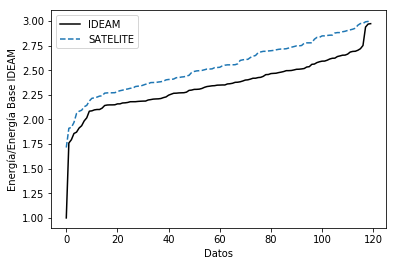

In [103]:
grafica(serie_pd,serie_pd21)

## 3.Metodología Medición-Correlación-Predicción (MCP) 

- Función para cortar la serie larga en periodos más cortos

In [104]:
def periodo (serie_larga,agno_inicio,agno_final,mes_inicio,mes_final):
    
    nuevo=pd.DataFrame(columns=["AÑO", "MES", "DIA","HORA" ,"GHI"])

    guardar=[]
    
    for agno in range(agno_inicio,agno_final):
    
        for mes in range(mes_inicio,mes_final):

            datos=serie_larga.loc[(serie_larga["AÑO"] == agno)& (serie_larga["MES"] == mes)]
            guardar.append(datos)
            ghi_df = pd.concat(guardar)
            

    return ghi_df

In [105]:
serie_pd21=periodo(serie_pd2,2006,2017,1,13)

- Función de ajuste

In [106]:
def fun (x,a,b):
        return a+(b*x)

- Función para reemplazar los números negativos de una serie por ceros

In [107]:
def negativos (serie):

    num = serie._get_numeric_data()
    num[num < 0] = 0
    
    return serie

- Función para la MCP

In [108]:
def MCP (obj,ref,año_inicial,año_final,mes):
    
    datos_corr= ref.copy()
    
    ref_p=periodo(ref,año_inicial,año_final,1,mes)
    
    MCP= pd.DataFrame(columns=["AÑO", "MES", "DIAS", "GHI_cor"])
    
    nombre_1=list(obj)[-1]
    nombre_2=list(ref)[-1]
 
    prom_obj=obj[nombre_1].mean()
    prom_ref=ref_p[nombre_2].mean()
    
    std_obj=obj[nombre_1].std()
    std_ref=ref_p[nombre_2].std()
    rel_std=std_obj/std_ref
    const= prom_obj-(rel_std*prom_ref)
    
    datos_ref=ref[nombre_2]
    c=fun(datos_ref,const,rel_std)
    
    datos_corr['NREL']=c
    
    datos_corregidos_sinnegativo=negativos(datos_corr)
    
    return datos_corr

## 4.Cálculo de los indicadores de error (RMSEn,MEB,KSI)

In [109]:
def RMSEn (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
    
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    difference=(fila_ideam-fila_corregida)**2
    mean_difference=difference.mean()
    
    minimo=min(fila_ideam)
    maximo=max(fila_ideam)
    rmse_val = np.sqrt(mean_difference)/(maximo-minimo)*100
    
    return rmse_val

In [110]:
def MEB (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
    
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    difference=(fila_corregida-fila_ideam)
    sum_difference=difference.sum()
    sum_ideam=fila_ideam.sum()
    
    meb_val=(sum_difference/sum_ideam)*100
    
    return meb_val

In [111]:
def KSI (serie_ideam,serie_corregida):
    
    nombre_1=list(serie_ideam)[-1]
    nombre_2=list(serie_corregida)[-1]
        
    fila_ideam=serie_ideam[nombre_1]
    fila_corregida=serie_corregida[nombre_2]
    
    ksi=stats.ks_2samp(fila_ideam,fila_corregida)
    pvalue=ksi[1]
    
    return pvalue

## Análisis de la eficacia del método MCP 

In [112]:
def calculo (serie,agno_inicial,agno_final,mes,nombre):
    
    datos=pd.DataFrame(columns=[nombre,"RMSE [%]","MEB [%]","KSI (p-value)"])
    error_meb=[]
    error_rmse=[]
    error_ksi=[]
    
    
    
    for agno1 in range (agno_inicial,agno_final):
        
            
            c=agno1+1
            mes=mes
            serie_mes=periodo(serie_pd,agno_inicial,c,1,mes)
            serie_cor_mes=MCP(serie_mes,serie,agno_inicial,agno_final,mes)
            negativos(serie_cor_mes)
            error_RMSE_mes=RMSEn(serie_pd,serie_cor_mes)
            error_MEB_mes=MEB(serie_pd,serie_cor_mes)
            error_KSI_mes=KSI(GHImensual(serie_pd),GHImensual(serie_cor_mes))

            error_rmse.append(error_RMSE_mes)
            error_meb.append(error_MEB_mes)
            error_ksi.append(error_KSI_mes)
            
   
        
    datos['RMSE [%]']=pd.Series(error_rmse)
    datos['MEB [%]']=pd.Series(error_meb)
    datos['KSI (p-value)']=pd.Series(error_ksi)

    
    return datos
    

### - Analisis del efecto de la longitud de las series

In [113]:
mes_1=calculo(serie_pd21,2006,2007,2,"MESES")
mes_3=calculo(serie_pd21,2006,2007,4,"MESES")
mes_6=calculo(serie_pd21,2006,2007,7,"MESES")
años=calculo(serie_pd21,2006,2016,13,"MESES")

In [114]:
frames=[mes_1,mes_3,mes_6,años]
tabla=pd.concat(frames)
meses=np.array([1,3,6,12,24,36,48,60,72,84,96,108,120])

In [115]:
tabla['MESES']=meses
index=range(0,13)
tabla.index=index

#### - Tabla de errores para series de diferente longitud

In [116]:
tabla

,MESES,RMSE [%],MEB [%],KSI (p-value)
0,1,13.017534,6.818398,0.000028
1,3,12.839150,4.828844,0.001416
2,6,12.580665,1.598407,0.088885
3,12,12.696060,3.466999,0.020874
4,24,12.735585,3.713404,0.013917
5,36,12.672243,2.723265,0.044587
6,48,12.674664,2.761161,0.044587
7,60,12.579149,1.225877,0.122279
8,72,12.547423,0.679497,0.366570
9,84,12.563989,0.942553,0.219572


#### - Cálculo de errores para la serie satelital original

In [117]:
datos=pd.DataFrame(columns=["NREL","RMSE [%]","MEB [%]","KSI (p-value)"])
error_RMSE_mes=np.array([RMSEn(serie_pd,serie_pd21)])
error_MEB_mes=MEB(serie_pd,serie_pd21)
error_KSI_mes=KSI(GHImensual(serie_pd),GHImensual(serie_pd21))
datos['RMSE [%]']=error_RMSE_mes
datos['MEB [%]']=error_MEB_mes
datos['KSI (p-value)']=error_KSI_mes
datos

,NREL,RMSE [%],MEB [%],KSI (p-value)
0,NaN,13.009079,7.35556,0.000015


#### - Gráfica del error RMSEn para series de diferente longitud

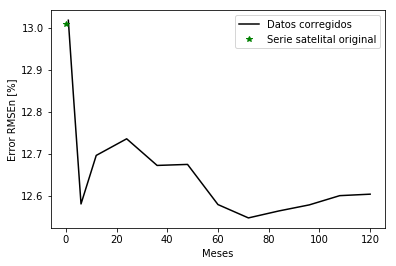

In [118]:
pylab.xlabel("Meses")
pylab.ylabel("Error RMSEn [%]")
pylab.plot(tabla['MESES'],tabla['RMSE [%]'],'-k',label="Datos corregidos")
pylab.plot(0,datos['RMSE [%]'],'*g',label="Serie satelital original")
pylab.legend(loc='upper right')

#### - Gráfica del error MEB para series de diferente longitud

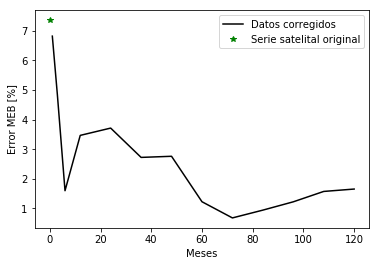

In [119]:
pylab.xlabel("Meses")
pylab.ylabel("Error MEB [%]")
pylab.plot(tabla['MESES'],tabla['MEB [%]'],'-k',label="Datos corregidos")
pylab.plot(0,datos['MEB [%]'],'*g',label="Serie satelital original")
pylab.legend(loc='upper right')

#### - Gráfica del p-value para series de diferente longitud

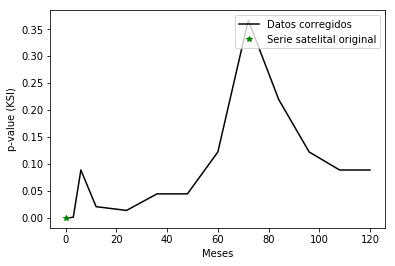

In [120]:
pylab.xlabel("Meses")
pylab.ylabel("p-value (KSI)")
pylab.plot(tabla['MESES'],tabla['KSI (p-value)'],'-k', label="Datos corregidos")
pylab.plot(0,datos['KSI (p-value)'],'*g',label="Serie satelital original")
pylab.legend(loc='upper right')

### Análisis del efecto del largo de la serie en el ajuste

De acuerdo a los resultados obtenidos en la modificación del largo de la serie utilizada para realizar el ajuste, podemos decir que cumplen con lo esperado. Por un lado, el error RMSEn disminuye a medida que la serie (IDEAM) utilizada para el ajuste es más larga, en el error MEB tiene un comportamiento similar. Por otro lado, el comportamiento del p-value es coherente con los obtenidos en los errores de sesgo debido a que es mayor en los puntos donde los errores de sesgo son menores, esto se debe a que un p-value más cercano a 1 significa que las series comparadas tienen distribuciones más similares.

Por otro lado, comparando los errores obtenidos en las series corregidas y el error obtenido con la serie satelital original podemos observar que en general hay una disminución del error, siendo el ajuste con el mes 1 el único punto donde el error aumenta o disminuye muy poco con respecto a la serie satelital original.

Igualmente, se puede observar que, en todos los meses, menos en el de 1 mes, se logró obtener un valor del error de sesgo MEB menor al 5%, lo que indica que el ajuste mediante MCP está reportando buenos resultados, de igual forma es claro que el error de sesgo RMSEn es el menos sensible al ajuste pues los valores de error varían en un 0.4%.

Por último, se puede evidenciar que los errores de sesgo disminuyen considerablemente y el p-value aumenta cuando se llega al año 2010, lo que revela que en ese año algún fenómeno natural pudo alterar los datos medidos (IDEAM).


### - Analisis en el uso de diferentes años

In [121]:
año_1=calculo(serie_pd21,2006,2007,13,"AÑO")
año_2=calculo(serie_pd21,2007,2008,13,"AÑO")
año_3=calculo(serie_pd21,2008,2009,13,"AÑO")
año_4=calculo(serie_pd21,2009,2010,13,"AÑO")
año_5=calculo(serie_pd21,2010,2011,13,"AÑO")
año_6=calculo(serie_pd21,2011,2012,13,"AÑO")
año_7=calculo(serie_pd21,2012,2013,13,"AÑO")
año_8=calculo(serie_pd21,2013,2014,13,"AÑO")
año_9=calculo(serie_pd21,2014,2015,13,"AÑO")
año_10=calculo(serie_pd21,2015,2016,13,"AÑO")

In [122]:
frames=[año_1,año_2,año_3,año_4,año_5,año_6,año_7,año_8,año_9,año_10]
tabla_1=pd.concat(frames)
años=np.array([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

In [123]:
tabla_1['AÑO']=años
index_1=range(0,10)
tabla_1.index=index_1

#### - Tabla de errores para diferentes años

In [124]:
tabla_1

,AÑO,RMSE [%],MEB [%],KSI (p-value)
0,2006,12.631126,2.462415,0.044587
1,2007,12.792474,4.218911,0.003719
2,2008,12.583236,1.425571,0.122279
3,2009,12.637173,2.409636,0.044587
4,2010,12.500782,-0.078212,0.563757
5,2011,12.572057,1.162258,0.165311
6,2012,12.612549,1.504220,0.088885
7,2013,12.622546,1.927405,0.063500
8,2014,12.574080,0.836998,0.219572
9,2015,12.541249,0.492666,0.459738


#### - Gráfica del error RMSEn para series de diferentes años

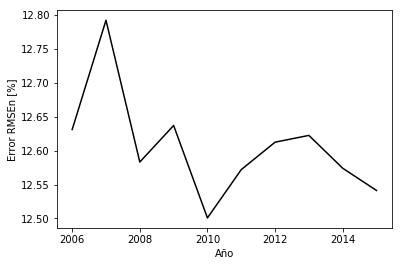

In [125]:
pylab.xlabel("Año")
pylab.ylabel("Error RMSEn [%]")
pylab.plot(tabla_1['AÑO'],tabla_1['RMSE [%]'],'-k')

#### - Gráfica del error MEB para series de diferentes años

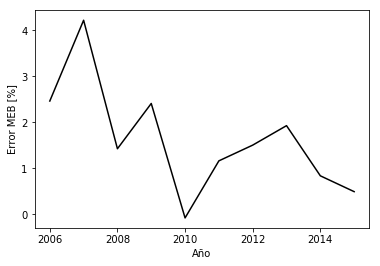

In [126]:
pylab.xlabel("Año")
pylab.ylabel("Error MEB [%]")
pylab.plot(tabla_1['AÑO'],tabla_1['MEB [%]'],'-k')

#### - Gráfica del p-value para series de diferentes años

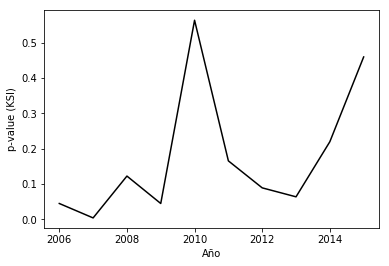

In [127]:
pylab.xlabel("Año")
pylab.ylabel("p-value (KSI)")
pylab.plot(tabla_1['AÑO'],tabla_1['KSI (p-value)'],'-k')

In [128]:
IDEAM_mensual=GHImensual(serie_pd)
SATEL_mensual=GHImensual(serie_pd21)
I=IDEAM_mensual['GHImes']
S=SATEL_mensual['GHImes']

In [129]:
numdatos_IDEAM = range(len(IDEAM_mensual))
numdatos_SATEL = range(len(SATEL_mensual))

Text(0,0.5,'W/$m^{2}$ / W/$m^{2}$')

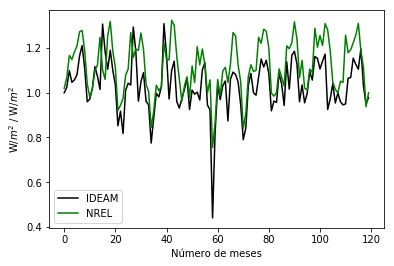

In [130]:
pylab.plot(numdatos_IDEAM,I/I[0],'-k', label='IDEAM')
pylab.plot(numdatos_SATEL,S/I[0],'-g', label='NREL')
pylab.legend(loc='lower left')
pylab.xlabel("Número de meses")
pylab.ylabel("W/$m^{2}$ / W/$m^{2}$")

### Análisis del uso de diferentes años en el ajuste

Luego de realizar el análisis con diferentes longitudes de datos para ajustar la serie, se buscó analizar el efecto que tenía en el ajuste realizarlo con diferentes años. Los resultados obtenidos muestran que el año 2010 y 2015 son los mejores años para realizar el ajuste pues se obtienen errores de sesgo, si observamos la gráfica en la celda anterior vemos que justo en estos años es donde los datos de IDEAM están más alejados de los datos tomados satelitales. 

Por otro lado, los años en los que se presentaron errores más altos como el año 2006 y 2007 son los años donde las series están más similares, lo que tiene mucho sentido debido a que donde las series están similares la MCP no alcanza a corregir los datos donde las series tienen una relación de varianzas mayor, mientras que si se hace la corrección donde las series son más diferentes es probable que se alcancen a corregir todos los datos de la serie, lo que reduce de manera significativa los errores de sesgo y el p-value.

Con respecto a la gran diferencia que existe en las series en el año 2010, se deben al fenómeno de la niña que se presentó a finales del año, como se evidencia en la gráfica. Igualmente, en el año 2015 hubo un fuerte fenómeno del niño que también puedo haber afectado los datos medidos satelitalmente.



- A continuación, se muestra una gráfica con los años donde la series son más parecidas resaltados en azul y por otra lado, los años donde son distintas resaltados en rojo.

In [131]:
año_2010=periodo(SATEL_mensual,2010,2011,1,13)
A_2010=año_2010['GHImes']
año_2015=periodo(SATEL_mensual,2015,2016,1,13)
A_2015=año_2015['GHImes']
año_2006=periodo(SATEL_mensual,2006,2007,1,13)
A_2006=año_2006['GHImes']
año_2007=periodo(SATEL_mensual,2007,2008,1,13)
A_2007=año_2007['GHImes']

Text(0,0.5,'W/$m^{2}$ / W/$m^{2}$')

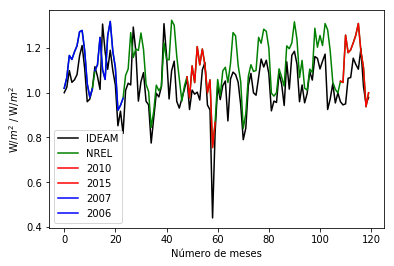

In [132]:
pylab.plot(numdatos_IDEAM,I/I[0],'-k', label='IDEAM')
pylab.plot(numdatos_SATEL,S/I[0],'-g', label='NREL')
pylab.plot(A_2010.index,A_2010/I[0],'-r', label='2010')
pylab.plot(A_2015.index,A_2015/I[0],'-r', label='2015')
pylab.plot(A_2007.index,A_2007/I[0],'-b', label='2007')
pylab.plot(A_2006.index,A_2006/I[0],'-b', label='2006')
pylab.legend(loc='lower left')
pylab.xlabel("Número de meses")
pylab.ylabel("W/$m^{2}$ / W/$m^{2}$")

- Tambien se gráfican las series corregidas en promedio diario para los años con errores más bajos y aquellas donde se presentaron errores más altos

In [133]:
serie_2010=MCP(periodo(serie_pd,2010,2011,1,13),serie_pd21,2010,2011,13)
serie_2006=MCP(periodo(serie_pd,2006,2007,1,13),serie_pd21,2006,2007,13)
serie_ideam=GHIdia(serie_pd)
serie_2010dia=GHIdia(serie_2010)
serie_2006dia=GHIdia(serie_2006)
datos_IDEAM = sorted(serie_ideam["GHIdiario"])
datos_2010 = sorted(serie_2010dia["GHIdiario"])
datos_2006 = sorted(serie_2006dia["GHIdiario"])


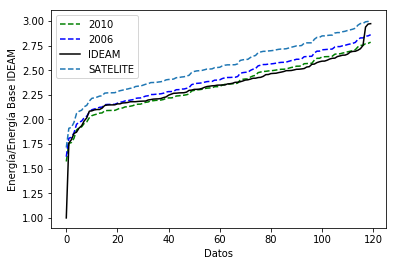

In [134]:

pylab.plot(range(len(datos_2010)),datos_2010/datos_IDEAM[0],'--g', label='2010')
pylab.plot(range(len(datos_2006)),datos_2006/datos_IDEAM[0],'--b', label='2006')
grafica(serie_pd,serie_pd21)

- En la gráfica se puede observar que las dos correcciones son bastante buenas, sin embargo la de 2010 es más cercana a la de datos IDEAM